# Shopping Trends Data Analysis

## A. Business Understanding

### Context

A retail chain is planning to enhance its pricing and marketing strategies by leveraging customer data. The company aims to predict the purchase amount for individual transactions. Understanding the factors that influence the purchase will allow the company to tailor its marketing campaign, optimize inventory management, and develop better promotional strategies.


### Objective

The company wants to predict the purchase amount for each transaction and wants to identify the different factors which influences the purchase amount.


### About The Dataset

This data was a record transactions done since last year. The description is as follows:
- Customer ID
- Age - Age of the customer
- Gender - Gender of the customer (Male/Female)
- Category - Category of the item purchased
- Location - Location where the purchase was made
- Size - Size of the purchased item
- Color - Color of the purchased item
- Season - Season during which the purchase was made
- Review Rating - Rating given by the customer for the purchased item
- Subscription Status - Indicates if the customer has a subscription (Yes/No)
- Shipping Type - Type of shipping chosen by the customer
- Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
- Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
- Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
- Preferred Payment Method - Customer's most preferred payment method
- Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)
- Purchase Amount (USD) - The amount of the purchase in USD

### Q
1. Based on the objective given above, what is the purpose of this project? 
2. What kind of machine learning problem is it? Supervised or unsupervised learning? Why?
3. Is it a regression or a classification problem? Why?

## B. Data Understanding

### Load The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("shopping_trends_dataset.csv")
df.head()

,Customer ID,Age,Gender,Category,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Purchase Amount (USD)
0,1,55,Male,Clothing,L,NaN,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,7.204824,Venmo,Fortnightly,53
1,2,19,Male,Clothing,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,6.107572,Cash,Fortnightly,64
2,3,50,Male,Clothing,S,NaN,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,5.473226,Credit Card,Weekly,73
3,4,21,Male,Footwear,M,NaN,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,7.583040,PayPal,Weekly,90
4,5,45,Male,Clothing,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,2.711304,PayPal,Annually,49


### Data Types and Structures

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Size                      3900 non-null   object 
 5   Color                     900 non-null    object 
 6   Season                    3900 non-null   object 
 7   Review Rating             3850 non-null   float64
 8   Subscription Status       3900 non-null   object 
 9   Payment Method            3900 non-null   object 
 10  Shipping Type             3900 non-null   object 
 11  Discount Applied          3900 non-null   object 
 12  Promo Code Used           3900 non-null   object 
 13  Previous Purchases        3900 non-null   float64
 14  Preferre

### Summary Statistics

In [4]:
df.describe()

,Customer ID,Age,Review Rating,Previous Purchases,Purchase Amount (USD)
count,3900.000000,3900.000000,3850.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,3.749325,5.401307,59.764359
std,1125.977353,15.207589,0.715432,1.884724,23.685392
min,1.000000,18.000000,2.500000,1.062706,20.000000
25%,975.750000,31.000000,3.100000,4.038949,39.000000
50%,1950.500000,44.000000,3.700000,5.386817,60.000000
75%,2925.250000,57.000000,4.400000,6.754694,81.000000
max,3900.000000,70.000000,5.000000,9.932370,100.000000


### Missing Values

In [5]:
df.isna().sum()

Customer ID                    0
Age                            0
Gender                         0
Category                       0
Size                           0
Color                       3000
Season                         0
Review Rating                 50
Subscription Status            0
Payment Method                 0
Shipping Type                  0
Discount Applied               0
Promo Code Used                0
Previous Purchases             0
Preferred Payment Method       0
Frequency of Purchases         0
Purchase Amount (USD)          0
dtype: int64

### Duplicated Rows

In [6]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


### Data Distribution (Numerical Variables)

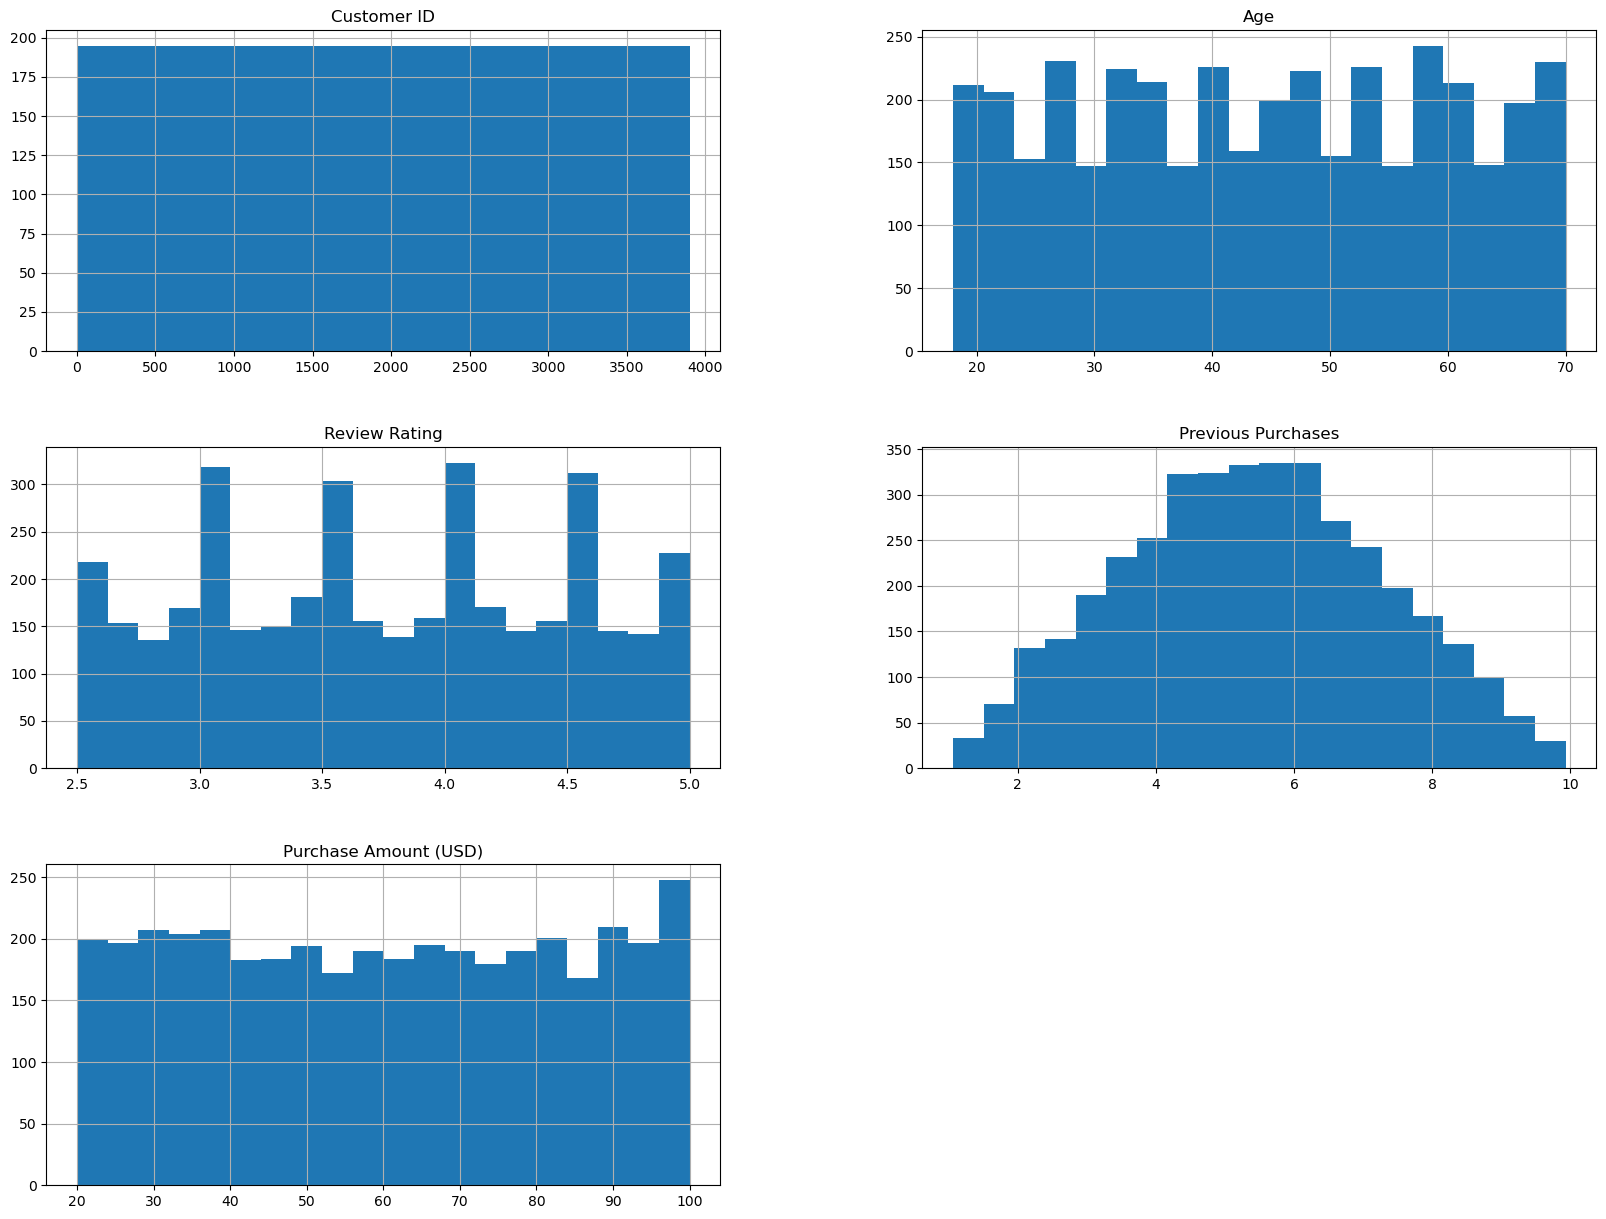

In [7]:
# Plot histograms for numerical variables
df.hist(bins=20, figsize=(20,15))
plt.show()

### Data Distribution (Categorical Variables)

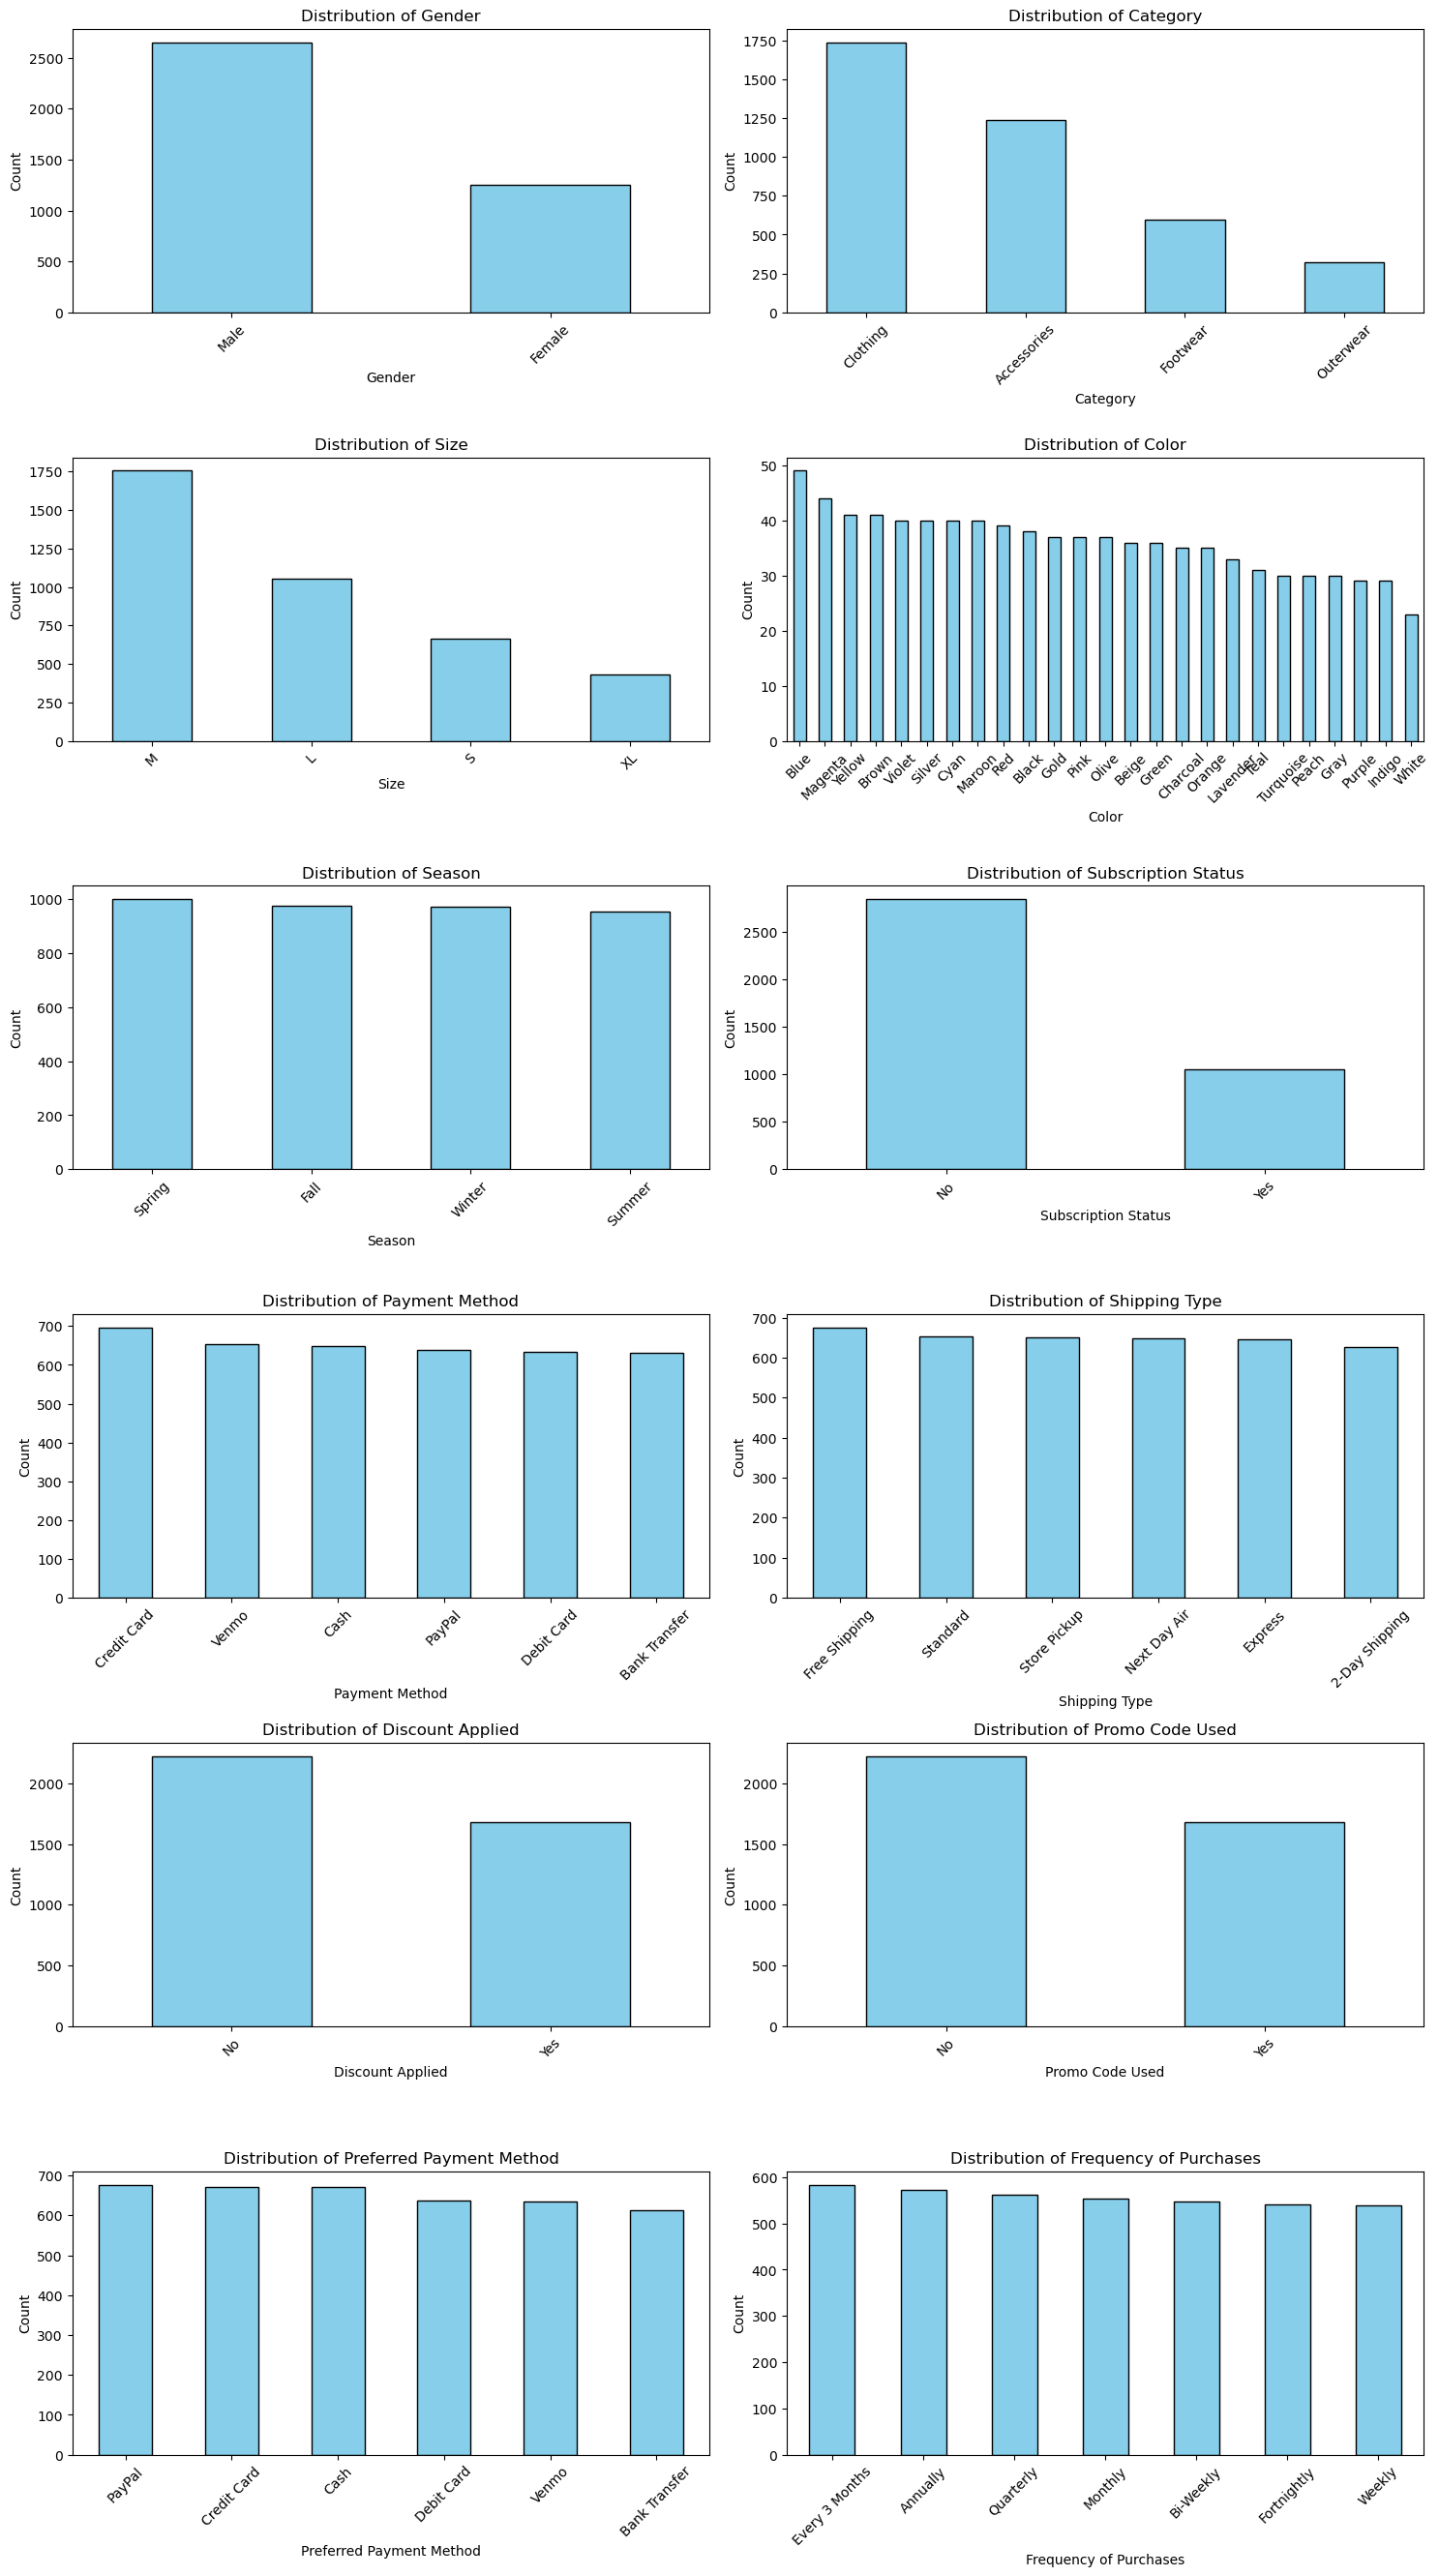

In [8]:
# Plot bar plots for categorical variables

# List of categorical columns to visualize
categorical_columns = ['Gender', 'Category', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

# Set up the figure
plt.figure(figsize=(15, 30))

# Iterate through categorical columns and create a bar plot for each
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(7, 2, i)  # Arrange plots in a 2x2 grid
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

### Pair Plot

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


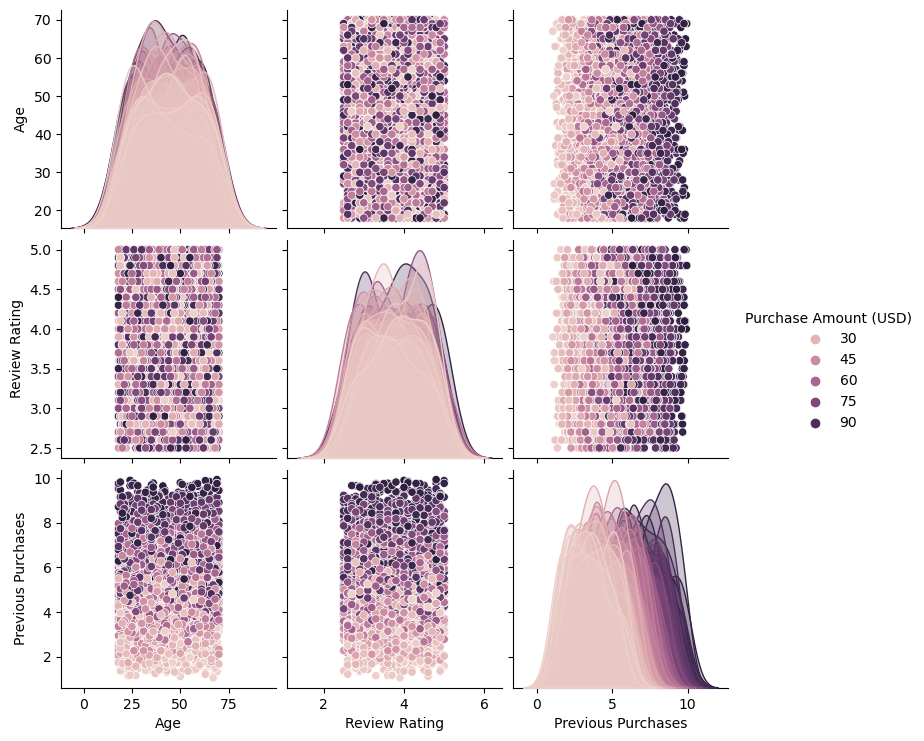

In [9]:
# Select a subset of columns for the pair plot
pairplot_columns = ['Age', 'Review Rating', 'Previous Purchases', 'Purchase Amount (USD)']

# Plot pair plot
sns.pairplot(df[pairplot_columns], hue='Purchase Amount (USD)')
plt.show()

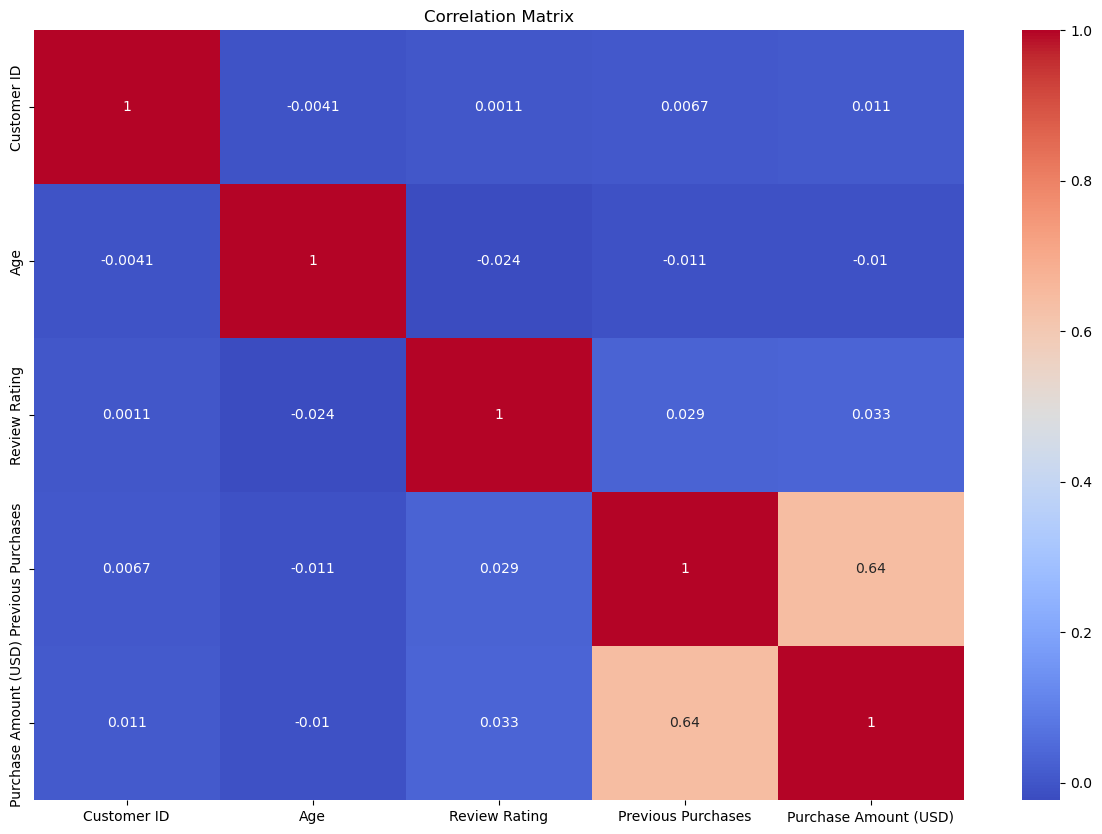

In [10]:
# Calculate correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Display the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Q
1. What insights have we gained from this step?
2. Are the data types for each column correct?
3. Are there any missing or duplicate values? How do we handle them?
4. How is the distribution of the data, and how do the variables correlate with each other?

## C. Data Preparation

### Handling Missing Values

In [11]:
# drop Color column
df_cleaned= df.drop("Color", axis=1)

# Fill Review Rating column with the column's average
df_cleaned["Review Rating"].fillna(df_cleaned["Review Rating"].mean(), inplace=True)

# Verify the result
df_cleaned.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Category                    0
Size                        0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
Purchase Amount (USD)       0
dtype: int64

### Encoding Categorical Variables

Encoding is a common technique used to convert categorical values to numerical. In this project, we will use two common encoding methods: one-hot encoding and label encoding. 
- One-hot encoding creates a binary column for each category, assigning a value of 1 for the category present and 0 for others, which is useful for non-ordinal categorical variables. 
- Label encoding, on the other hand, assigns a unique numerical value to each category, which works well for ordinal categorical variables where the order of the values matters.

In [12]:
#One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=["Gender", "Category", "Season", "Payment Method", "Shipping Type", 
                                                "Preferred Payment Method", "Frequency of Purchases"])
df_encoded.head()

,Customer ID,Age,Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Purchase Amount (USD),Gender_Female,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,L,3.1,Yes,Yes,Yes,7.204824,53,False,...,False,False,True,False,False,False,True,False,False,False
1,2,19,L,3.1,Yes,Yes,Yes,6.107572,64,False,...,False,False,False,False,False,False,True,False,False,False
2,3,50,S,3.1,Yes,Yes,Yes,5.473226,73,False,...,False,False,False,False,False,False,False,False,False,True
3,4,21,M,3.5,Yes,Yes,Yes,7.583040,90,False,...,False,True,False,False,False,False,False,False,False,True
4,5,45,M,2.7,Yes,Yes,Yes,2.711304,49,False,...,False,True,False,True,False,False,False,False,False,False


In [13]:
# Label Encoding
le = LabelEncoder()
le.fit(["S", "M", "L", "XL"])
df_encoded["Size"] = le.fit_transform(df_encoded["Size"])

le.fit(["No", "Yes"])
df_encoded["Subscription Status"] = le.fit_transform(df_encoded["Subscription Status"])
df_encoded["Discount Applied"] = le.fit_transform(df_encoded["Discount Applied"])
df_encoded["Promo Code Used"] = le.fit_transform(df_encoded["Promo Code Used"])

df_encoded.head()

,Customer ID,Age,Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Purchase Amount (USD),Gender_Female,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,0,3.1,1,1,1,7.204824,53,False,...,False,False,True,False,False,False,True,False,False,False
1,2,19,0,3.1,1,1,1,6.107572,64,False,...,False,False,False,False,False,False,True,False,False,False
2,3,50,2,3.1,1,1,1,5.473226,73,False,...,False,False,False,False,False,False,False,False,False,True
3,4,21,1,3.5,1,1,1,7.583040,90,False,...,False,True,False,False,False,False,False,False,False,True
4,5,45,1,2.7,1,1,1,2.711304,49,False,...,False,True,False,True,False,False,False,False,False,False


### Feature Engineering

In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Customer ID                             3900 non-null   int64  
 1   Age                                     3900 non-null   int64  
 2   Size                                    3900 non-null   int32  
 3   Review Rating                           3900 non-null   float64
 4   Subscription Status                     3900 non-null   int32  
 5   Discount Applied                        3900 non-null   int32  
 6   Promo Code Used                         3900 non-null   int32  
 7   Previous Purchases                      3900 non-null   float64
 8   Purchase Amount (USD)                   3900 non-null   int64  
 9   Gender_Female                           3900 non-null   bool   
 10  Gender_Male                             3900 non-null   bool

In [15]:
# Discount + Promo
df_encoded["Discount and Promo"] = df_encoded["Discount Applied"] + df_encoded["Promo Code Used"]

In [16]:
# Purchase Amount/ Previous Purchases
df_encoded["Purchase Value"] = df_encoded["Purchase Amount (USD)"]/df_encoded["Previous Purchases"]

In [17]:
# Interaction Between Columns
df_encoded["Review Times Previous Purchases"] = df_encoded["Review Rating"] * df_encoded["Previous Purchases"]

### Feature Selection

In this project, we will select features based on its importance from a random forest regressor model. We will then select five most contributing columns for our model.

In [18]:
df_final = df_encoded.drop("Customer ID", axis=1)

X = df_final.drop(columns=['Purchase Amount (USD)'])
y = df_final['Purchase Amount (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

In [20]:
importance_df = pd.DataFrame({'Feature': X.columns,'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
6,Previous Purchases,0.515604
43,Purchase Value,0.482582
0,Age,0.000243
44,Review Times Previous Purchases,0.000212
2,Review Rating,0.000136
1,Size,0.000086
10,Category_Clothing,0.000045
15,Season_Summer,0.000038
9,Category_Accessories,0.000037
14,Season_Spring,0.000036


### Splitting The Data

To train a machine learning model, we divide our dataset into two parts: a training set (approximately 80% of the data) and a testing set (approximately 20%). The training set is used to teach the model by fitting it to the data, while the testing set is used to evaluate the model's performance on unseen data, ensuring it can generalize well to new inputs.

In [21]:
# Define the target variable and features
features = ["Previous Purchases", "Purchase Value", "Age", 
            "Review Times Previous Purchases", "Review Rating"]
X = df_final[features]
y = df_final["Purchase Amount (USD)"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3120, 5), (780, 5), (3120,), (780,))

## D. Modeling and Evaluation

For this project, we will compare three common regression model:
- Linear Regression
- Random Forest Regressor
- XGB Regressor


We will also use this evaluation metric:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R^2

### Training The Model

In [22]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Calculate metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

Linear Regression:
MAE: 4.34
MSE: 31.01
RMSE: 5.57
R²: 0.94


In [23]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calculate metrics
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regressor:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

Random Forest Regressor:
MAE: 0.44
MSE: 0.38
RMSE: 0.61
R²: 1.00


In [24]:
# XGB Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# Calculate metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGB Regressor:")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.2f}")

XGB Regressor:
MAE: 0.75
MSE: 0.91
RMSE: 0.96
R²: 1.00


## Conclusion
Across all evaluation metric, the random forest regressor model performs best compared to others.

## E. Deployment

In [25]:
# import joblib

# # Save the trained model to a file
# joblib_file = "rf_model.joblib"
# joblib.dump(rf, joblib_file)

# print(f"Model saved to {joblib_file}")
# Model is ready to be deployed!

## Review and Reflection

1. What have we accomplished in each step of the process? (Business Understanding - Evaluation)
2. Which parts can be improved?
3. What have we learned from this project?
4. What should we explore next to enhance our general knowledge of data science?